# In this lesson you will learn

 - What a CNN is and its components

 - How they internally work

 - CNN training with Python

## What a CNN is?

CNN stands for **Convolutional Neural Network**, which is a class of deep learning algorithms commonly used for **image recognition** and processing, as well as for other tasks involving grid-like data such as video analysis and natural language processing.

CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input data. They are particularly effective in analyzing visual imagery because they can learn directly from raw pixel values, obviating the need for manual feature extraction. CNNs use a variation of multilayer perceptrons designed to require minimal preprocessing. This makes them suitable for tasks like image and video recognition, in which the input data is often raw pixel values.

Two very advantages of the CNN are that they could be accurate no matter the location of the pattern (spatially invariant), and no matter the size of it.

## CNN components

1.- **Input image**: Each pixel of the input image is considered as a feature.

2.- **filter/kernel**: These layers apply convolutional operations to the input data, using small squares of input data called filters or kernels. These filters slide over the input data and learn to detect different features, such as edges, corners, or textures.

3.- **Activation functions**: After each convolutional operation, an activation function like ReLU (Rectified Linear Unit) is applied to introduce non-linearity into the model, allowing it to learn complex patterns.

4.- **Pooling layers**: Pooling layers down-sample the spatial dimensions of the input volume. Max-pooling, for example, selects the maximum value from a group of values in a certain region, reducing the dimensionality of the data and making the computation more manageable.

5.- **Fully connected layers**: After several convolutional and pooling layers, the final output is generated through one or more fully connected layers. These layers perform classification based on the features extracted by the previous layers.

## How a CNN works

A convolutional operation is a fundamental mathematical operation used in Convolutional Neural Networks (CNNs) to extract features from input data, such as images. The operation involves applying a filter or kernel to an input matrix (or tensor) to produce an output feature map.

1.- **Input Data** (Image): Consider an input image represented as a 2D **matrix** of pixel values. Each pixel in the image has a numerical value representing its color intensity. Also each image has several channels (3 in the case of RGB images).

2.- **Filter** (Kernel): A filter, also known as a kernel, is a smaller 2D matrix. During the convolutional operation, the filter slides (or **convolves**) across the input image. The filter matrix takes a value at every element (ij), randomnly generated by a uniform or normal distributions. Multiple filters, with different weights, are input at every step. The filter's purpose is to detect specific patterns or features within the input data. For example, a filter might be designed to detect edges or corners in an image.

3.- **Element-wise Multiplication and Summation**: At every location where the filter overlaps the input image, **each filter value is multiplied by the corresponding pixel in the image**. The resulting products are then added together to produce a single output value. As the kernel is convolving over the image we obtain several values stored in a matrix, which is the result of the convolutional operation. This matrix is called Feature map.


4.- **Output Feature Map**: The computed sum represents the value at a specific location in the output feature map. The process is repeated for every position where the filter can fit on the input image. As the filter slides over the input image, it captures different patterns, creating the output feature map. Except if the analyst indicates the opposite, the feature map matrix will be smaller than the original image.

5.- **Layer of Non-linearity functions**: It is standard to apply a non-linearity function to the feature map. Frequently, a Rectified Linear Function to each position at the feature map. This action allow the Network to learn more complex patterns

6.- **Pooling layer**: In some ways, pooling is similar to a convolution operation, since pooling involves using a filter and applying a function repeatedly accros an input space. Usually, in pooling operation the receptive fields do not overlap. The most common pooling function is the Maximum. Average is also often used. In short, the pooling kernel slides accros the feature map, each iteration returns the maximum value of that kernel, creating a reduced feature map, thus also reducing the computaional complexity retaining important information.


All these 6 steps conform a **convolutional layer**, a CNN includes several convolutional layers. After each convolutional layer definition, thanks to the computational complexity reduction, the convolutional layers become smaller but deeper.

[More information about CNNs](https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939/)

## Fully connected NN

After repeat several times the above steps defining the convolutional layers, the resulting feature map is flatenned becoming the input layer of a dense NN.

This resulting neural network is then trained, following the viewed in the last lesson (Backpropagation MLP), to classify the image.

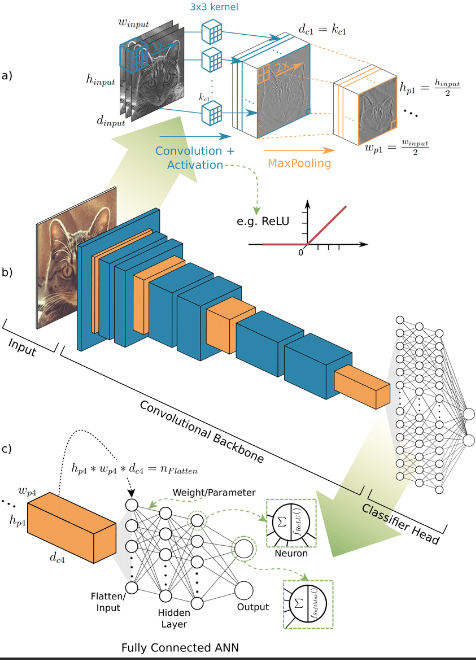

<img src="./../assets/CNN.png" alt="Second Image" style="width: 75%;"/>

## An example Step by step

1. **Image Input Data**

Image input data is expressed as a 3-dimensional matrix of width * height * channels. If you were using color images in the example, you would have three channels for the red, green, and blue pixel values, e.g., 32x32x3. Each channel meanning one color. If grayscale you only have one channel.

2. **Convolutional Layers**

You define ten kernels or filters with 3x3 width and height dimensions. The kernel is sliding through the image thus overlaping different corners of the image. At each sliding the convolutional operation occurs. Multipliying every position of the kernel with its corresponding in the image and adding the result.

If the kernel is 3x3 you should sum 9 multiplications, finally you add a bias and apply an activation function. The resut is stored in a new matrix called feature map.

Then you move one pixel to the right and repeat the operations going accros the entire image. As a result you obtain one feature map by kernel you create at the beginning.  

These steps can be repeated several times, so after appliying ten kernels to the original image, you can apply some others to the returned feature map.

<img src="https://towardsdatascience.com/wp-content/uploads/2020/08/1r13ZUdVTQwVuhDPmo3JKag.png" alt="Second Image" style="width: 35%;"/>

3. **Pooling layer**

You define a pooling layer with a width * height of 2x2 inputs. In pooling layer is often parametrized a stride of 2, to avoid overlaping. 

Polling layer obtains the maximum (or average) value of each 2x2 corner of the feature map. This results in a much smaller new feature map.

Pooling layer is helpful to reduce dimensionality, thus empowering efficency, and avoiding overfitting.
<img src="https://towardsdatascience.com/wp-content/uploads/2020/08/1sK7oP1m129V_oNGSsHIm_w-1024x505.png" alt="Second Image" style="width: 35%;"/>


4. **Fully Connected Layer**

Finally, you flatten out the square feature maps into a one dimensional flat array. This array is the input layer of a MLP which determines if that image belongs to one class or not, then, processing the cost function and backpropagating the errors to the entire Neuran Network, including MLP and CNN. Updating the weights of both networks.

The input layer of the MLP has the same number of neurons as the dimension of the last feature map.

In CNN the weights are the kernel values.




## Convolutional Neural Networks Best Practices

Now that you know about the building blocks for a convolutional neural network and how the layers hang together, you can review some best practices to consider when applying them.

 - **Input Receptive Field Dimensions**: The default is 2D for images but could be 1D for words in a sentence or 3D for a video that adds a time dimension.
Receptive Field Size: The patch should be as small as possible but large enough to “see” features in the input data. It is common to use 3×3 on small images and 5×5 or 7×7 and more on larger image sizes.

 - **Stride Width**: Use the default stride of 1. It is easy to understand, and you don’t need padding to handle the receptive field falling off the edge of your images. This could be increased to 2 or larger for larger images.

 - **Number of Filters**: Filters are the feature detectors. Generally, fewer filters are used at the input layer, and increasingly more filters are used at deeper layers.

 - **Pooling**: Pooling is a destructive or generalization process to reduce overfitting. The receptive field is almost always set to 2×2 with a stride of 2 to discard 75% of the activations from the output of the previous layer.

 - **Pattern Architecture**: It is common to pattern the layers in your network architecture. This might be one, two, or some number of convolutional layers followed by a pooling layer. This structure can then be repeated one or more times. Finally, fully connected layers are often only used at the output end and may be stacked one, two, or more deep.

 - **Dropout**: Dropout should be used between fully connected layers, so after convolutional operations and flatten. During de final MLP. 
 Also, `SpatialDropout2D` is a regularization technique used in convolutional neural networks. Unlike regular Dropout, which randomly drops individual neurons, `SpatialDropout2D` randomly drops entire feature maps (channels) during training. This helps prevent overfitting while preserving the spatial structure of the feature maps, which is important in convolutional layers. 

## Data Augmentation

Data augmentation is a technique used in machine learning and computer vision to increase the diversity and size of a dataset by applying various transformations to the existing data. These transformations create new variations of the original data, making the dataset more robust and improving the generalization ability of machine learning models. Data augmentation is especially useful in scenarios where the size of the original dataset is limited, which is a common challenge in training deep learning models.

The most common data augmentation:

1. **Rotation**: Rotating the image by a certain angle (e.g., 90 degrees) while keeping the object of interest intact.

2. **Flip**: Flipping the image horizontally or vertically, creating a mirrored version of the original image.

3. **Translation**: Shifting the image horizontally or vertically, simulating the effect of changing the object's position within the frame.

4. **Scaling**: Zooming in or out of the image, changing its scale while preserving its aspect ratio.

5. **Brightness**: Changing the brightness and contrast levels of the image to simulate different lighting conditions.

By applying these transformations to the original data, a much larger and more diverse dataset can be generated. During training, the model sees different variations of the data, helping it learn to recognize patterns and features more effectively. Data augmentation is a common practice in deep learning, particularly in tasks like image recognition, object detection, and semantic segmentation, where having a diverse dataset is crucial for building accurate and robust models.

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow

## Python example

https://www.tensorflow.org/tutorials/images/cnn?hl=es-419

In [3]:
!pip install opencv-python

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tabulate import tabulate

import cv2 as cv
import pathlib
from PIL import Image

from sklearn.metrics import accuracy_score,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\bvazq\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bvazq\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\bvazq\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Documentacion libreria OpenCV (Open Computer Vision)

https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html

## Import data

In [2]:
url_train = '../../../Data/Deep Learning/jellyfish/Train_Test_Valid/Train'
data = pathlib.Path(url_train)
fish_train = {
    "Moon_jellyfish": list(data.glob('Moon_jellyfish/*.jpg')),
    "barrel_jellyfish": list(data.glob('barrel_jellyfish/*.jpg')),
    "blue_jellyfish": list(data.glob('blue_jellyfish/*.jpg')),
    "compass_jellyfish" : list(data.glob('compass_jellyfish/*.jpg')),
    "lions_mane_jellyfish" : list(data.glob('lions_mane_jellyfish/*.jpg')),
    "mauve_stinger_jellyfish" : list(data.glob('mauve_stinger_jellyfish/*.jpg'))
}

labels_train = {
    "barrel_jellyfish" : 0,
    "blue_jellyfish":1,
    "compass_jellyfish":2,
    "lions_mane_jellyfish":3,
    "mauve_stinger_jellyfish":4,
    "Moon_jellyfish":5
}

In [6]:
fish_train['Moon_jellyfish'][0]

WindowsPath('../../../Data/Deep Learning/jellyfish/Train_Test_Valid/Train/Moon_jellyfish/01.jpg')

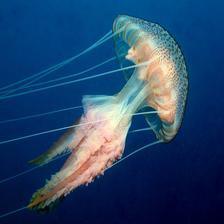

In [7]:
Image.open(str(fish_train["mauve_stinger_jellyfish"][0]))

In [8]:
X_train=[]
y_train=[]

for name, images in fish_train.items():
    for image in images:
        try:
            image = str(image).strip()
            img = cv.imread(image)
            img_resize = cv.resize(img,(200,200))
            X_train.append(img_resize)
            y_train.append(labels_train[name])

        except:
            print('Except')

X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape

(882, 200, 200, 3)

In [9]:
X_train

array([[[[ 42,  16,   4],
         [ 42,  16,   4],
         [ 42,  16,   4],
         ...,
         [ 39,  12,   2],
         [ 39,  12,   2],
         [ 39,  12,   2]],

        [[ 42,  16,   4],
         [ 42,  16,   4],
         [ 42,  16,   4],
         ...,
         [ 39,  12,   2],
         [ 39,  12,   2],
         [ 39,  12,   2]],

        [[ 42,  16,   4],
         [ 42,  16,   4],
         [ 42,  16,   4],
         ...,
         [ 39,  12,   2],
         [ 39,  12,   2],
         [ 39,  12,   2]],

        ...,

        [[ 23,   9,   3],
         [ 23,   9,   3],
         [ 23,   9,   3],
         ...,
         [ 15,   6,   2],
         [ 15,   6,   2],
         [ 15,   6,   2]],

        [[ 23,   9,   3],
         [ 23,   9,   3],
         [ 23,   9,   3],
         ...,
         [ 15,   6,   2],
         [ 15,   6,   2],
         [ 15,   6,   2]],

        [[ 23,   9,   3],
         [ 23,   9,   3],
         [ 23,   9,   3],
         ...,
         [ 15,   6,   2],
        

In [10]:
url_test = '../../../Data/Deep Learning/jellyfish/Train_Test_Valid/test/'
data = pathlib.Path(url_test)
fish_test = {
    "Moon_jellyfish": list(data.glob('Moon_jellyfish/*.jpg')),
    "barrel_jellyfish": list(data.glob('barrel_jellyfish/*.jpg')),
    "blue_jellyfish": list(data.glob('blue_jellyfish/*.jpg')),
    "compass_jellyfish" : list(data.glob('compass_jellyfish/*.jpg')),
    "lions_mane_jellyfish" : list(data.glob('lions_mane_jellyfish/*.jpg')),
    "mauve_stinger_jellyfish" : list(data.glob('mauve_stinger_jellyfish/*.jpg'))
}

labels_test = {
    "barrel_jellyfish" : 0,
    "blue_jellyfish":1,
    "compass_jellyfish":2,
    "lions_mane_jellyfish":3,
    "mauve_stinger_jellyfish":4,
    "Moon_jellyfish":5
}

In [11]:
X_test=[]
y_test=[]

for name, images in fish_test.items():
    for image in images:
        try:
            image = str(image).strip()
            img = cv.imread(image)
            img_resize = cv.resize(img,(200,200))
            X_test.append(img_resize)
            y_test.append(labels_test[name])

        except:
            print('Except')

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test.shape

(74, 200, 200, 3)

In [119]:
y_test

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4])

## Testing class balance

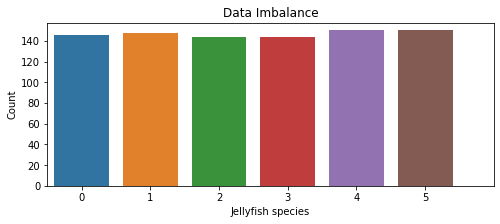

In [12]:
plt.figure(figsize=(8, 3))
g = sns.countplot(x = y_train)
g.set_xticks(range(7))
g.set_xticks(range(len(list(labels_train.keys()))))
plt.title('Data Imbalance')
plt.xlabel('Jellyfish species')
plt.ylabel('Count')
plt.show()


## Training CNN

In [19]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(200,200,3)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding="valid"))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())

model.add(Conv2D(264,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))

model.add(Dense(6,activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size = 100,
                    validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9/9 [==============================] - 34s 2s/step - loss: 139.4840 - accuracy: 0.1993 - val_loss: 1.7523 - val_accuracy: 0.2958
Epoch 2/10
9/9 [==============================] - 6s 639ms/step - loss: 1.6617 - accuracy: 0.3130 - val_loss: 1.7226 - val_accuracy: 0.2113
Epoch 3/10
9/9 [==============================] - 6s 627ms/step - loss: 1.4511 - accuracy: 0.4596 - val_loss: 1.6412 - val_accuracy: 0.3803
Epoch 4/10
9/9 [==============================] - 6s 632ms/step - loss: 1.2185 - accuracy: 0.5416 - val_loss: 1.4990 - val_accuracy: 0.4225
Epoch 5/10
9/9 [==============================] - 6s 627ms/step - loss: 1.6096 - accuracy: 0.5041 - val_loss: 1.7552 - val_accuracy: 0.2676
Epoch 6/10
9/9 [==============================] - 6s 634ms/step - loss: 1.1896 - accuracy: 0.5557 - val_loss: 1.7996 - val_accuracy: 0.2958
Epoch 7/10
9/9 [==============================] - 6s 640ms/step - loss: 0.9020 - accuracy: 0.6577 - val_loss: 2.0212 - val_accuracy: 0.3099
Epoch 8/10
9/9 [===============

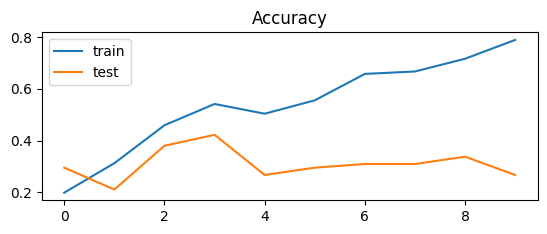

In [20]:
plt.subplot(211)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

## Data Augmentation

In [21]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    # rescale=1./255,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.4,
    # brightness_range = [0.2, 0.5],
    vertical_flip = True,
    horizontal_flip = True,
    zoom_range = 0.2
    )

# img_gen.fit(X_train)
augmented_data_generator  = img_gen.flow(X_train, y_train, batch_size=300) # ,subset='training',shuffle=True
batch = augmented_data_generator.next()



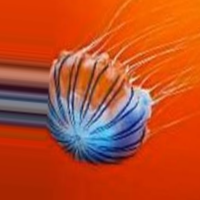

In [165]:
imagen = Image.fromarray(np.uint8(batch[0][153]))
imagen

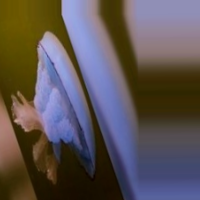

In [173]:
imagen = Image.fromarray(np.uint8(batch[0][25]))
imagen

In [22]:
X_train_aug = np.concatenate((X_train, batch[0]), axis=0)
y_train_aug = np.concatenate((y_train, batch[1]), axis=0)

In [180]:
X_train_aug.shape

(1153, 200, 200, 3)

In [43]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(200,200,3), kernel_regularizer=l1(0.01)))
model.add(Dropout(0.2))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())

model.add(Conv2D(264,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128,activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu', kernel_regularizer=l1(0.01)))

model.add(Dense(6,activation='softmax')) # 6 es por el número de clases a clasificar

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train_aug, y_train_aug, epochs=40, batch_size = 50,
                    validation_data=(X_test, y_test))

Epoch 1/40
24/24 [==============================] - 6s 143ms/step - loss: 240.9341 - accuracy: 0.2689 - val_loss: 149.3086 - val_accuracy: 0.4789
Epoch 2/40
24/24 [==============================] - 3s 132ms/step - loss: 121.2589 - accuracy: 0.3435 - val_loss: 94.4083 - val_accuracy: 0.4648
Epoch 3/40
24/24 [==============================] - 3s 135ms/step - loss: 79.9927 - accuracy: 0.3981 - val_loss: 65.7989 - val_accuracy: 0.4085
Epoch 4/40
24/24 [==============================] - 3s 136ms/step - loss: 57.3980 - accuracy: 0.4128 - val_loss: 48.7225 - val_accuracy: 0.4366
Epoch 5/40
24/24 [==============================] - 3s 135ms/step - loss: 43.0398 - accuracy: 0.4449 - val_loss: 37.2837 - val_accuracy: 0.5634
Epoch 6/40
24/24 [==============================] - 3s 135ms/step - loss: 33.4927 - accuracy: 0.4614 - val_loss: 29.4512 - val_accuracy: 0.5070
Epoch 7/40
24/24 [==============================] - 3s 133ms/step - loss: 26.6926 - accuracy: 0.4770 - val_loss: 23.9193 - val_accura

## Model Validation

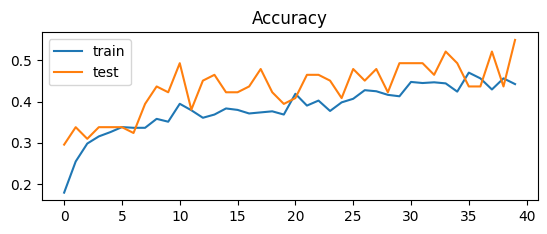

In [42]:
plt.subplot(211)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

In [14]:
def plot_confusion_matrix(y_test,y_pred,model_name):
    plt.figure(figsize=(5,5))
    #cm = confusion_matrix(y_test,y_pred)
    cm = tf.math.confusion_matrix(y_test,y_pred)
    hmap = sns.heatmap(cm,cbar=False,annot=True,cmap="Blues",fmt='.0f')
    hmap.set_title('Confusion Matrix {}'.format(model_name))
    hmap.set_xlabel('predicted label')
    hmap.set_ylabel('true label')
    plt.show()

3/3 [==============================] - 0s 15ms/step - loss: 9.0164 - accuracy: 0.5493
Independent Test Accuracy:  0.5492957830429077


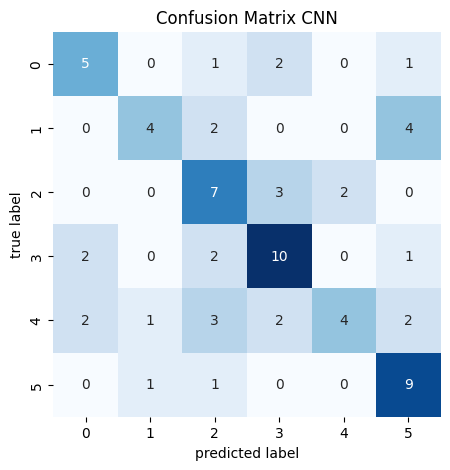

              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.67      0.40      0.50        10
           2       0.44      0.58      0.50        12
           3       0.59      0.67      0.62        15
           4       0.67      0.29      0.40        14
           5       0.53      0.82      0.64        11

    accuracy                           0.55        71
   macro avg       0.57      0.55      0.54        71
weighted avg       0.58      0.55      0.54        71



In [37]:
y_preds = model.predict(X_test)
print("Independent Test Accuracy: ",model.evaluate(X_test,y_test)[1])
y_preds_tranf = [np.argmax(y_preds[i]) for i in range(len(y_preds))]
plot_confusion_matrix(y_test,y_preds_tranf,'CNN')
print(classification_report(y_test, y_preds_tranf))

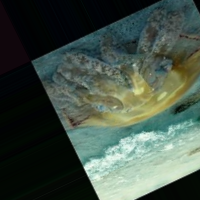

## Ejemplo de clasificación con 100 clases

La librería keras ofrece un dataset con 50.000 imágenes clasificadas en 100 clases diferentes. Vamos a diseñar una red CNN para predecir esas clases.

Las imágenes no son de gran calidad ni tienen mucha nitidez. En concreto, tienen tan solo 32 pixeles de altura y anchura.

In [1]:
# !pip install --force-reinstall protobuf==3.19.6
# !pip install "absl-py<2.0.0,>=0.9" --force-reinstall


  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.30.2
    Uninstalling protobuf-6.30.2:
      Successfully uninstalled protobuf-6.30.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
ortools 9.11.4210 requires absl-py>=2.0.0, but you have absl-py 1.4.0 which is incompatible.
ortools 9.11.4210 requires protobuf<5.27,>=5.26.1, but you have protobuf 3.19.6 which is incompatible.


  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
ortools 9.11.4210 requires absl-py>=2.0.0, but you have absl-py 1.4.0 which is incompatible.
ortools 9.11.4210 requires protobuf<5.27,>=5.26.1, but you have protobuf 3.19.6 which is incompatible.


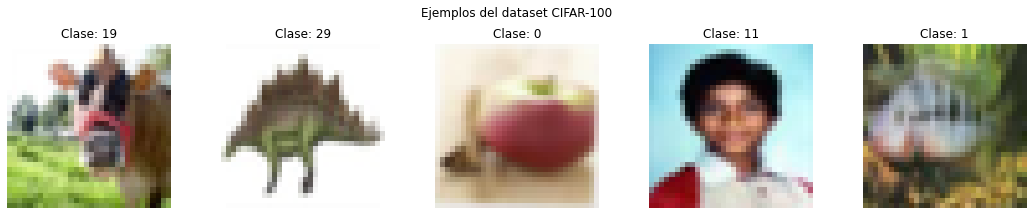

In [2]:
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt

# Cargar dataset (100 clases)
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Mostrar algunas imágenes
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i])
    ax.set_title(f"Clase: {y_train[i][0]}")
    ax.axis('off')
plt.suptitle("Ejemplos del dataset CIFAR-100")
plt.tight_layout()
plt.show()


Más ejemplos de imágenes

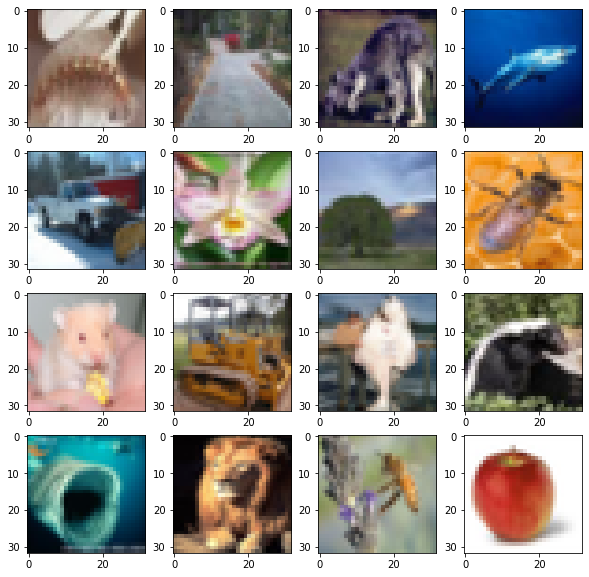

In [20]:
# Show randomly 16 images in the CIFAR-100
plt.figure(figsize=(10, 10))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(x_train[rand_num])

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
model = Sequential()
 
model.add(Conv2D(64,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# model.add(Conv2D(512,(3,3),padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Conv2D(512,(3,3),padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 32, 32, 128)      

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size = 5000,
                    validation_split=0.2)

Epoch 1/10


C:\Users\bvazq\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 755s 95s/step - loss: 4.2741 - accuracy: 0.0851 - val_loss: 36.4844 - val_accuracy: 0.0331
Epoch 2/10
8/8 [==============================] - 875s 111s/step - loss: 3.6085 - accuracy: 0.1721 - val_loss: 18.4422 - val_accuracy: 0.0352
Epoch 3/10
8/8 [==============================] - 870s 110s/step - loss: 3.2667 - accuracy: 0.2381 - val_loss: 9.9492 - val_accuracy: 0.0490
Epoch 4/10
8/8 [==============================] - 949s 120s/step - loss: 2.9793 - accuracy: 0.2946 - val_loss: 6.2136 - val_accuracy: 0.0837
Epoch 5/10
8/8 [==============================] - 974s 124s/step - loss: 2.7093 - accuracy: 0.3541 - val_loss: 4.9721 - val_accuracy: 0.0986
Epoch 6/10
8/8 [==============================] - 984s 124s/step - loss: 2.4673 - accuracy: 0.4083 - val_loss: 3.9799 - val_accuracy: 0.1361
Epoch 7/10
8/8 [==============================] - 980s 122s/step - loss: 2.2258 - accuracy: 0.4661 - val_loss: 3.9694 - val_accuracy: 0.1346
Epoch 8/10
8/8 [=======

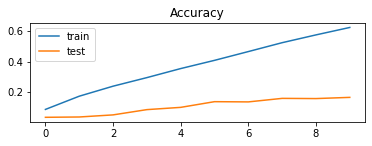

In [6]:
plt.subplot(211)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

Como vemos la red entrenada es bastante floja. La accuracy alcanza un 62% en entrenamiento (Lo que está bastante bien), pero solo 16% en los datos de validación. 

Además existe un claro sobreajuste (overfitting), y se ve en cómo la red va mejorando sus métricas con el conjunto de datos de entrenamiendo de manera mucho más rápida que con los datos de validación.

Analizando la matriz de confusión vemos que solo se están prediciendo imágenes en la clase 1, una prueba más de que es una red defectuosa.

No obstante, su entrenamiento ha llevado bastante tiempo debido a la complejidad de los datos. En cualquier caso, nos vale como un ejemplo más de cómo entrenar una red CNN.

In [12]:
# Translate categorial to array for drawing confusion matrix
from sklearn.metrics import confusion_matrix
from numpy import argmax
prediction = []
true_labels = []

pred = model.predict(x_test)
print(y_test.shape[0])
for i in range(y_test.shape[0]):
  prediction.append(argmax(pred[i]))
  true_labels.append(argmax(y_test[i]))

cm = confusion_matrix(prediction, true_labels)

313/313 [==============================] - 33s 105ms/step
10000


[[ 26   0   0 ...   0   0   0]
 [ 89   0   0 ...   0   0   0]
 [118   0   0 ...   0   0   0]
 ...
 [ 59   0   0 ...   0   0   0]
 [886   0   0 ...   0   0   0]
 [351   0   0 ...   0   0   0]]


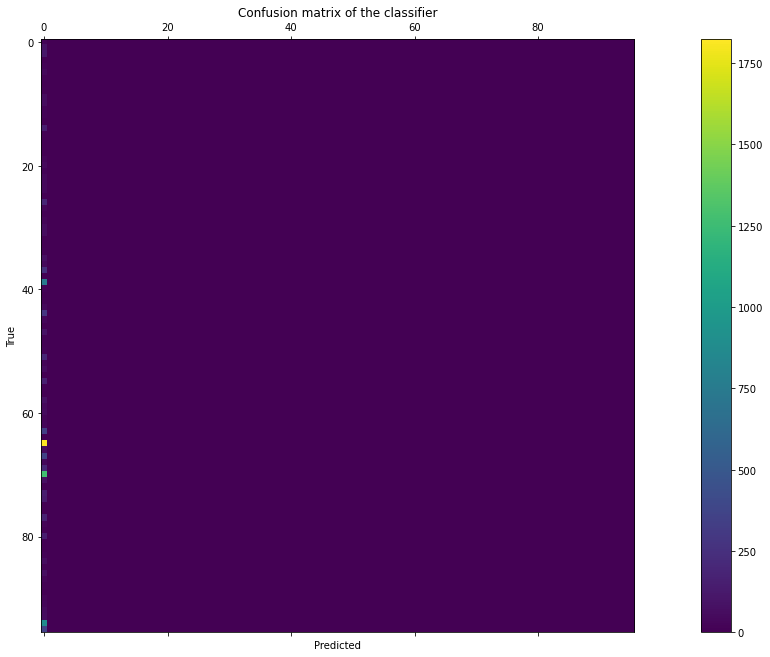

In [13]:
print(cm)
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(211)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [17]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
        500, 500, 500, 500, 500, 500, 5